# Clustering de espécies de ratos utilizando KMeans

In [63]:
# Importações de libraries importantes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from sklearn.cluster import KMeans

In [64]:
# Carregamento do dataset
df = pd.read_csv("dataset.csv")
del df["id"]

In [65]:
df

,rat_weight,rat_height,rat_bodywater,species
0,121,15,0.8,Ratus norvegicus
1,93,12,0.8,Ratus spatios
2,81,11,0.8,Ratus spatios
3,96,13,0.8,Ratus terranus
4,112,16,0.8,Ratus spatios
5,97,12,0.8,Ratus norvegicus
6,101,13,0.8,Ratus terranus
7,144,18,0.6,Ratus norvegicus
8,116,13,0.6,Ratus terranus
9,20,1,0.6,Ratus spatios


In [66]:
X = df[["rat_weight", "rat_height", "rat_bodywater"]]

In [67]:
X = np.array(X)

In [68]:
# Teste para saber melhor número de clusters através do método elbow
K = range(1, 10)
distorcoes = []

for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(X)
    distorcoes.append(kmean.inertia_)

C:\Users\Kayky\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


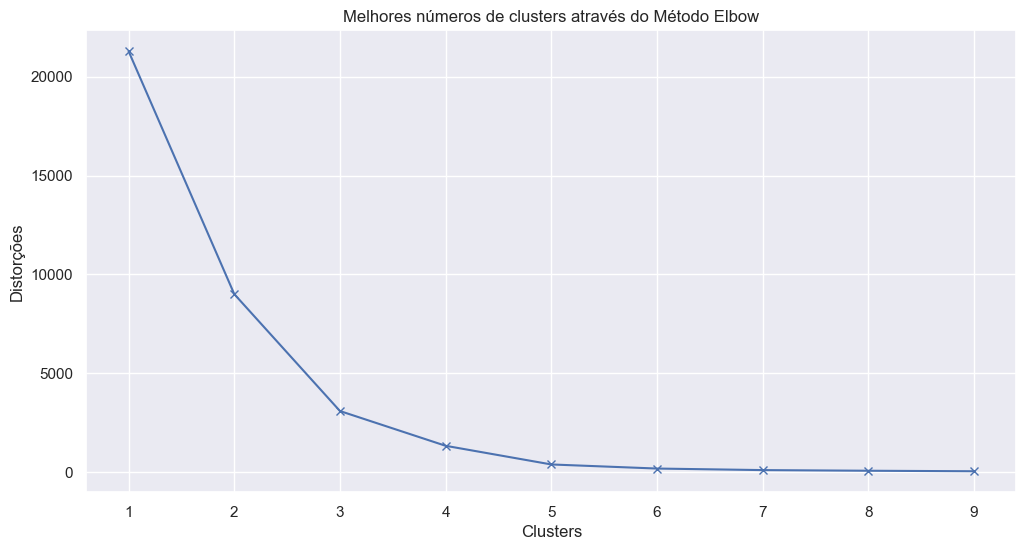

In [69]:
# Plota o método elbow (distoções vs no. de clusters)
plt.figure(figsize=(12,6))
plt.plot(K, distorcoes, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Distorções')
plt.title('Melhores números de clusters através do Método Elbow')
plt.show()

In [70]:
# Fita o modelo com o melhor número de clusters (n=3) identificado usando o gráfico do método elbow
kmean_model = KMeans(n_clusters=3, random_state=23994)
predict = kmean_model.fit_predict(X)

In [71]:
df["Predicted"] = predict

In [72]:
df

,rat_weight,rat_height,rat_bodywater,species,Predicted
0,121,15,0.8,Ratus norvegicus,1
1,93,12,0.8,Ratus spatios,1
2,81,11,0.8,Ratus spatios,1
3,96,13,0.8,Ratus terranus,1
4,112,16,0.8,Ratus spatios,1
5,97,12,0.8,Ratus norvegicus,1
6,101,13,0.8,Ratus terranus,1
7,144,18,0.6,Ratus norvegicus,0
8,116,13,0.6,Ratus terranus,1
9,20,1,0.6,Ratus spatios,2


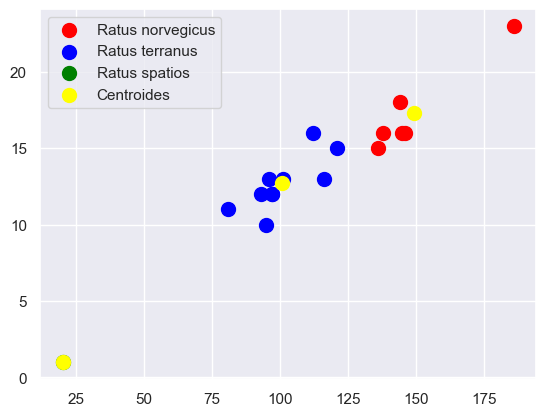

In [73]:
# Plota os clusters
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 100, c = 'red', label = 'Ratus norvegicus')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 100, c = 'blue', label = 'Ratus terranus')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s = 100, c = 'green', label = 'Ratus spatios')
# Plota os centroides dos clusters
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroides')
plt.legend()
plt.show()

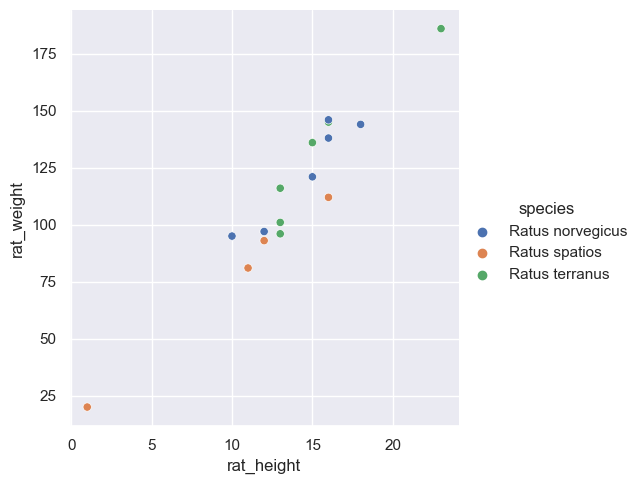

In [74]:
# Plota a classificação real dos dados clusterizados
sbn.relplot(data=df, x=df["rat_height"], y=df["rat_weight"], hue=df["species"])
plt.show()